In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [ ]:

df.drop(['ID','Gender'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision (in value)  50553 non-null  float64
 9   Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


In [ ]:
list=['Claim','Duration','Net Sales','Commision (in value)','Age']
for col in list:
    sns.distplot(df[col],kde=True)
    plt.show()
    

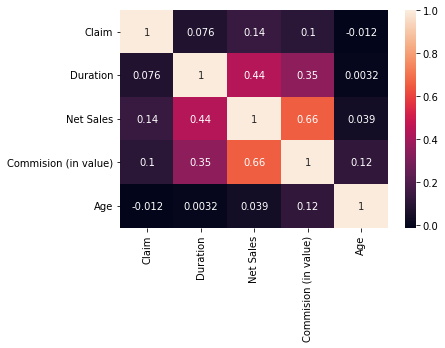

In [ ]:
sns.heatmap(df.corr(),annot=True)

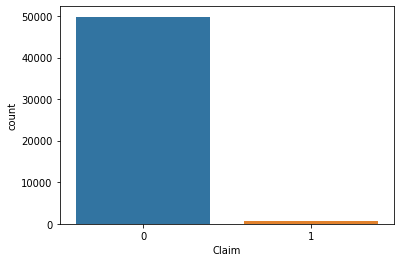

In [ ]:
sns.countplot(df['Claim'])

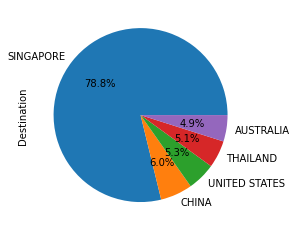

In [ ]:
#Top 5 counteris with claim
df["Destination"].loc[df['Claim']==1].value_counts().sort_values(ascending=False).head().plot.pie(autopct="%.1f%%",explode=[0,0,0,0,0])

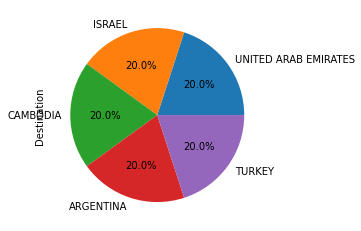

In [ ]:
#last 5 countries with claim
df["Destination"].loc[df['Claim']==1].value_counts().sort_values(ascending=False).tail().plot.pie(autopct="%.1f%%",explode=[0,0,0,0,0])

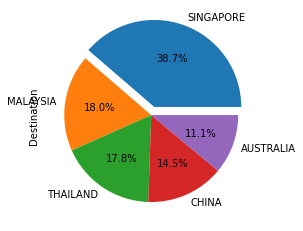

In [ ]:
#Top 5 counteris with no insurance claim
df["Destination"].loc[df['Claim']==0].value_counts().sort_values(ascending=False).head().plot.pie(autopct="%.1f%%",explode=[0.1,0,0,0,0])

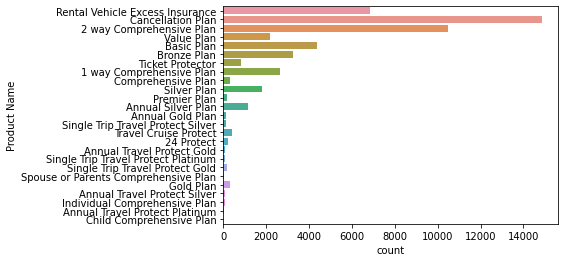

In [ ]:
sns.countplot(data=df,y='Product Name')

Text(0, 0.5, 'Number of people insured')

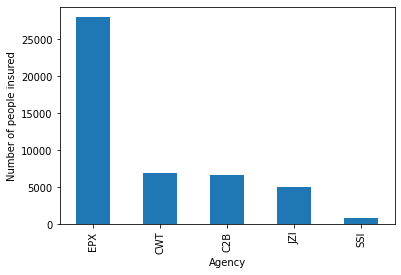

In [ ]:
#Top 10 Agencies 
df['Agency'].value_counts().sort_values(ascending=False).head().plot.bar()
plt.xlabel("Agency")
plt.ylabel("Number of people insured")

Text(0, 0.5, 'Number of people insured')

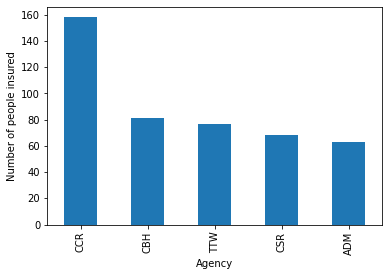

In [ ]:
#last 10 Agencies 
df['Agency'].value_counts().sort_values(ascending=False).tail().plot.bar()
plt.xlabel("Agency")
plt.ylabel("Number of people insured")

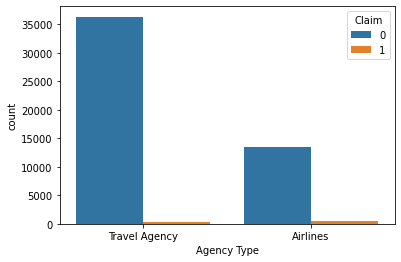

In [ ]:
#Comparision between Agency type
sns.countplot(df['Agency Type'],hue=df['Claim'])

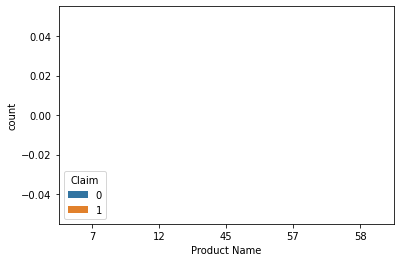

In [ ]:
sns.countplot(df['Product Name'].value_counts().sort_values().head(),hue=df['Claim'])

In [ ]:
oe=OrdinalEncoder()
df[['Agency','Agency Type','Distribution Channel','Destination','Product Name']]=oe.fit_transform(df[['Agency','Agency Type','Distribution Channel','Destination','Product Name']])

In [ ]:
df[['Agency','Agency Type','Distribution Channel','Destination','Product Name']]

,Agency,Agency Type,Distribution Channel,Destination,Product Name
0,6.0,1.0,1.0,56.0,16.0
1,7.0,1.0,1.0,79.0,10.0
2,6.0,1.0,1.0,56.0,16.0
3,7.0,1.0,1.0,38.0,1.0
4,7.0,1.0,1.0,47.0,10.0
...,...,...,...,...,...
50548,6.0,1.0,1.0,65.0,16.0
50549,7.0,1.0,1.0,38.0,0.0
50550,10.0,1.0,1.0,38.0,24.0
50551,7.0,1.0,1.0,7.0,10.0


In [ ]:
x=df.drop(['Claim'],axis=1)
x

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,6.0,1.0,1.0,16.0,7,56.0,0.0,17.82,31
1,7.0,1.0,1.0,10.0,85,79.0,69.0,0.00,36
2,6.0,1.0,1.0,16.0,11,56.0,19.8,11.88,75
3,7.0,1.0,1.0,1.0,16,38.0,20.0,0.00,32
4,7.0,1.0,1.0,10.0,10,47.0,15.0,0.00,29
...,...,...,...,...,...,...,...,...,...
50548,6.0,1.0,1.0,16.0,11,65.0,99.0,59.40,50
50549,7.0,1.0,1.0,0.0,48,38.0,20.0,0.00,36
50550,10.0,1.0,1.0,24.0,24,38.0,28.0,10.64,48
50551,7.0,1.0,1.0,10.0,25,7.0,15.0,0.00,36


In [ ]:
y=df['Claim']
y

0        0
1        0
2        0
3        0
4        0
        ..
50548    0
50549    0
50550    0
50551    0
50552    0
Name: Claim, Length: 50553, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ros=RandomUnderSampler()
x,y=ros.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [ ]:
ann=Sequential()
ann.add(Dense(units=7,activation="relu")) #unit=Neuron
ann.add(Dense(units=5,activation="relu"))

ann.add(Dense(units=1,activation="sigmoid")) #For output
ann.compile(optimizer='adam',loss="binary_crossentropy")
#loss if multi classification take soft_max
ann.fit(xtrain,ytrain, epochs=600,validation_data=(xtest,ytest))

In [ ]:
ann.history.history

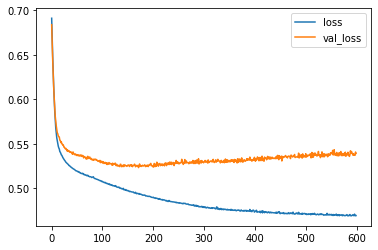

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       218
           1       0.79      0.69      0.74       227

    accuracy                           0.75       445
   macro avg       0.75      0.75      0.75       445
weighted avg       0.75      0.75      0.75       445



In [ ]:
ann = Sequential()
ann.add(Dense(units=8, activation="relu"))
ann.add(Dense(units=5, activation="relu"))

ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=40)

In [ ]:
ann.fit(xtrain, ytrain, epochs=800, validation_data=(xtest, ytest), callbacks=[earlystop])

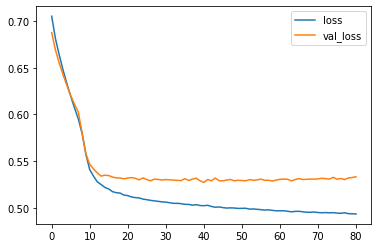

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.71      0.79      0.75       218
           1       0.78      0.69      0.73       227

    accuracy                           0.74       445
   macro avg       0.74      0.74      0.74       445
weighted avg       0.74      0.74      0.74       445



In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
ann = Sequential()

ann.add(Dense(units=10, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=5, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation="sigmoid"))

ann.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
ann.fit(xtrain, ytrain, epochs=1000, validation_data=(xtest, ytest), callbacks=[earlystop])

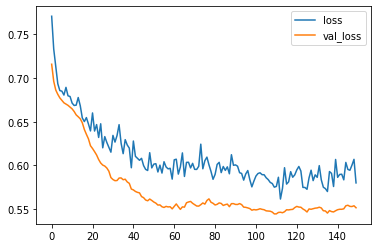

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred = ann.predict(xtest)

In [ ]:
ypred = ypred>0.5

In [ ]:
from sklearn.metrics import classification_report,recall_score

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       218
           1       0.80      0.67      0.73       227

    accuracy                           0.75       445
   macro avg       0.76      0.75      0.75       445
weighted avg       0.76      0.75      0.75       445



In [ ]:
#OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x,y=ros.fit_resample(x,y)

In [ ]:
ann=Sequential()
ann.add(Dense(units=7,activation="relu")) #unit=Neuron
ann.add(Dense(units=5,activation="relu"))

ann.add(Dense(units=1,activation="sigmoid")) #For output
ann.compile(optimizer='adam',loss="binary_crossentropy")
#loss if multi classification take soft_max
ann.fit(xtrain,ytrain, epochs=600,validation_data=(xtest,ytest))

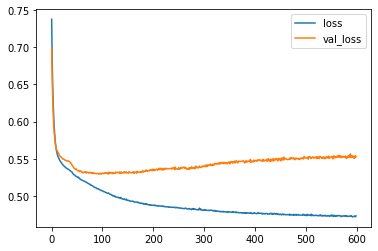

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.71      0.83      0.77       218
           1       0.81      0.68      0.74       227

    accuracy                           0.75       445
   macro avg       0.76      0.75      0.75       445
weighted avg       0.76      0.75      0.75       445



In [ ]:
from tensorflow.keras.layers import Dropout
ann = Sequential()
ann.add(Dense(units=9, activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=5, activation="relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=100)

In [ ]:

ann.fit(xtrain, ytrain, epochs=350, validation_data=(xtest, ytest), callbacks=[earlystop])

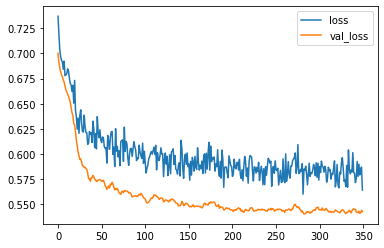

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.71      0.83      0.76       218
           1       0.81      0.67      0.73       227

    accuracy                           0.75       445
   macro avg       0.76      0.75      0.75       445
weighted avg       0.76      0.75      0.75       445



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))

0.748314606741573


In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       218
           1       0.82      0.64      0.72       227

    accuracy                           0.75       445
   macro avg       0.76      0.75      0.74       445
weighted avg       0.76      0.75      0.74       445



#DATASET SPECIFICATION
 Source dataset is in csv format
 Dataset contains 50553 rows and 10 colummns
 There are more than 50% missing values in Gender column
 The Dataset is an example of Classification as it notifies insurance is claimed or not .Net sales and commission column are highly correlated with each other

#DATA PREPROCESSING
As there were more than 50% null values in gender column,so it is droped.
Scaling has been done to bring all values to a single scale.
Random over sampler is also used to increase the data of '1' or 'claim (yes)' class because data of yes class was very less compared to No class

#ALGORITHM USED:
1.Aritifical Neural Network
2.Logistic Regression






#Using Oversampling technique
An accuracy of 71% is achieved through the model.

#Using Undersampling technique
An accuracy of 73% is acheived through the model

#Using Logistic Regression Model
An accuracy of 75% is achieved through the model